# Labeled Faces in the Wild

http://vis-www.cs.umass.edu/lfw/

## このデータベースを利用する目的：

制御された撮影環境にによる画像のデータベースではなく、さまざまな撮影環境で撮影された画像セットに対する顔の検出・顔の照合に使われるデータベース。近年、画像認識技術の評価に用いられることが増えてきている。

## 評価上の注意：

- 東洋人の顔が少ない。
- 既に顔画像が正規化されている。両目の位置は既に一致するようになっている。
- rollの評価は、別途画像を回転させて検出率を評価すること。
- 有名人の画像であるので、その同じ有名人が既に検出などの学習の被写体として利用されている可能性がある。
- 報道などの撮影で用いられた画像とみられるので、フォーカスや画像の明るさなどは確保された画像になっている比率が高い。

顔検出が面内回転に対してどれくらい頑強かを評価する。

データベースによっては既に目位置を正規化してあり、
面内回転を加えたデータで評価してはじめて、実際環境での顔検出能力を評価できる。

そこで、このスクリプトでは、データに面内回転を加えた画像を作って
検出率を評価している。


In [1]:
%matplotlib inline
import pandas as pd

In [2]:
import glob
dataset = "lfw"
names = glob.glob("lfw/lfw/*/*.jpg")
names.sort()
scales = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

In [3]:
# names = names[:10]

In [4]:
import dlibFrontal as faceDetector
for scale in scales:
    faceDetector.processDatabase(dataset, names, scale=scale)

/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


# 検出処理後のデータ解析

In [5]:
dfs={}
deg = 0
for scale in scales:
    dfs[scale] = pd.read_csv("log_%s_%d_%f.csv" % (dataset, deg, scale))
    print scale, dfs[scale]["truePositives"].mean()

1.0 0.940149625935162
0.9 0.9167233431572583
0.8 0.9265472681931535
0.7 0.9382604095821053
0.6 0.6951560492707625
0.5 0.07239477064913474
0.4 0.0005289805788558906
0.3 0.0
0.2 0.0
0.1 0.0


In [6]:
rates = [dfs[scale]["truePositives"].mean() for scale in scales]
falseRates = [dfs[scale]["falsePositives"].mean() for scale in scales]
data = {"scales":scales, "rates":rates, "falseRates":falseRates}
df = pd.DataFrame(data, columns=["scales", "rates", "falseRates"])

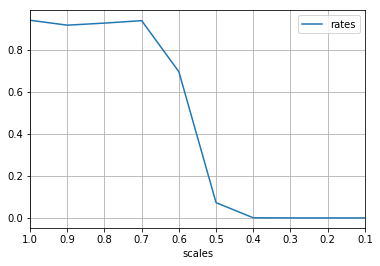

In [7]:
df.plot(x="scales", y="rates", grid=True)

上の図は、画像の面内回転によって、どれだけ検出率が変化するのかを示している。

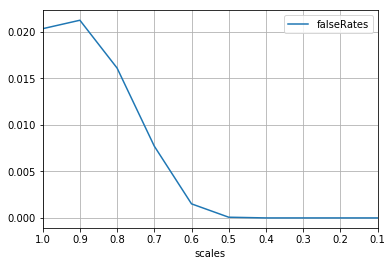

In [8]:
df.plot(x="scales", y="falseRates", grid=True)

# NaNを含む値の平均をなんとかしたい
import numpy as np
rates = [dfs[scale]["truePositives"].mean() for scale in scales]
falseRates = [dfs[scale]["falsePositives"].mean() for scale in scales]
scale =1.0
dfs[scale]["meanSize"]



# NaNを含む値の平均をなんとかしたい
np.nanmean(dfs[scale]["meanSize"]) 
meanSize= [np.nanmean(dfs[scale]["meanSize"]) for scale in scales]
data = {"scale":scales, "rates":rates, "falseRates":falseRates, "meanSize":meanSize}
df = pd.DataFrame(data, columns=["scale", "rates", "falseRate", "meanSize"])